<div style="
    background-color:#b30000;
    color:white;
    padding:8px 16px;
    font-size:30px;
    font-weight:bold;
    border-radius:6px;
    margin:10px 0;
">
Capstone Project | Employee Retention Prediction
</div>

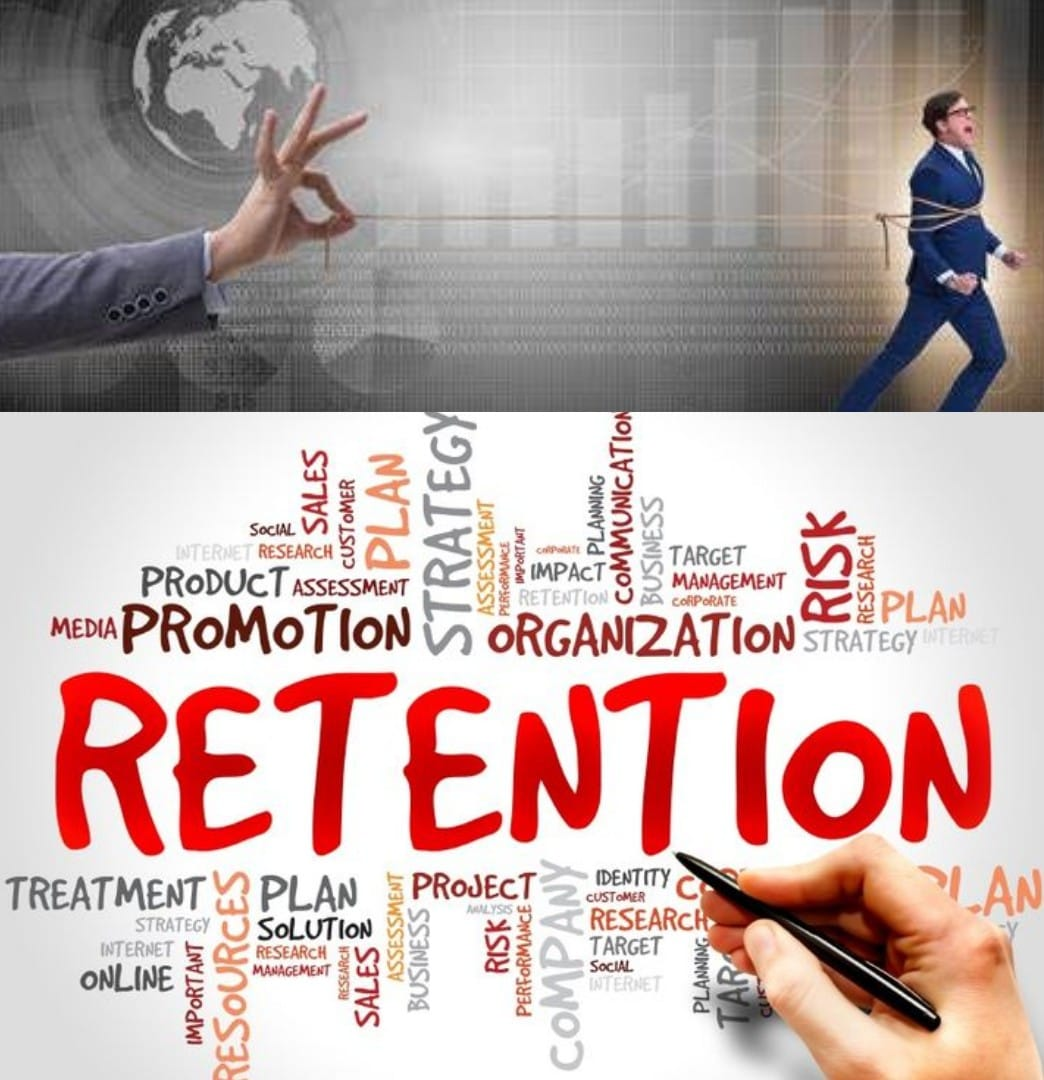

<div style="display:flex; gap:25px; align-items:stretch; margin-top:20px;">

<!-- LEFT TEXT BOX -->
<div style="
    width:60%;
    background-color:#ffffff;
    padding:30px;
    border-left:6px solid #b30000;
    box-shadow:2px 2px 10px rgba(0,0,0,0.12);
">

<h2 style="
    color:#b30000;
    font-family:Arial, sans-serif;
    margin-top:0;
">
Problem Statement:
</h2>

<p style="
    color:#4f6a75;
    font-size:16px;
    line-height:1.7;
    text-align:justify;
">
In this project, we aim to address the challenge of retaining talented data scientists, whose turnover
can disrupt workforce management and increase recruitment costs. Our goal is to build a robust machine learning model that accurately predicts whether a data scientist is likely to seek a job change. By leveraging this predictive capability,the firm can enhance talent retention strategies, improve recruitment planning, optimizeresource allocation, and make data-driven decisions through
comprehensive visualizationsand comparative analysis of various algorithms.
</p>

</div>

<!-- RIGHT IMAGE BOX -->
<div style="
    width:40%;
    background-color:#f9f6f2;
    padding:15px;
    box-shadow:2px 2px 10px rgba(0,0,0,0.12);
    display:flex;
    align-items:center;
    justify-content:center;
">

<img src="https://images.unsplash.com/photo-1521737604893-d14cc237f11d"
     style="
        width:100%;
        height:auto;
        border-radius:4px;
     ">

</div>

</div>

<div style="
    background-color:#ffffff;
    padding:35px;
    border-left:6px solid #b30000;
    box-shadow:2px 2px 10px rgba(0,0,0,0.12);
    margin-top:30px;
">

<h2 style="color:#b30000; margin-top:0;">
Objectives:
</h2>

<ul style="
    color:#4f6a75;
    font-size:16px;
    line-height:1.8;
    padding-left:20px;
">

<li><b>Data Exploration:</b> Conduct comprehensive exploratory data analysis (EDA) using visualization techniques to understand feature distributions and their relationships with the target variable.</li>

<li><b>Data Preprocessing:</b> Handle missing values, encode categorical variables, and apply appropriate scaling techniques for numerical variables.</li>

<li><b>Feature Engineering:</b> Create new features or transform existing ones to improve overall model performance.</li>

<li><b>Model Selection:</b> Evaluate various classification algorithms including Logistic Regression, Random Forest, XGBoost, and LightGBM for predicting job change likelihood.</li>

<li><b>Handling Imbalanced Data:</b> Implement techniques such as SMOTE to address potential class imbalance in the target variable.</li>

<li><b>Performance Evaluation:</b> Use appropriate metrics such as accuracy, ROC-AUC score, and confusion matrices to assess model performance.</li>

<li><b>Visualization:</b> Create clear and informative visualizations using libraries like Matplotlib and Seaborn to communicate data insights and model performance.</li>

</ul>
</div>

<h2 align="left"><font color=red>Let's get started:</font></h2>

<div style="
    background-color:#3b1b5a;
    color:white;
    padding:20px;
    border-radius:12px;
    font-style:italic;
    font-size:16px;
    box-shadow: 0px 4px 12px rgba(0,0,0,0.4);
">
<b>📝 TASK:</b><br>
This project focuses on predicting employee retention, where the target variable has two possible outcomes: employees(Data Scientist) who are likely to stay and those who are likely to leave the organization. 
<li>This is formulated as a binary classification problem, where:
<li>1 → Employee likely to leave</li>
<li>0 → Employee likely to stay</li>
</div>

<div style="
    background-color:#b30000;
    color:white;
    padding:8px 16px;
    font-size:22px;
    font-weight:bold;
    border-radius:4px;
    margin:8px 0;
">
Step 1 | Import Libraries
</div>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

<div style="
    background-color:#b30000;
    color:white;
    padding:8px 16px;
    font-size:22px;
    font-weight:bold;
    border-radius:4px;
    margin:8px 0;
">
Step 2 | Read Dataset
</div>

<div style="border-radius:4px; padding: 10px; background-color: #facfc8; font-size:125%; text-align:left">
Two datasets are used in this project:

<li>2.1 Training Dataset:</li>
<li>a. Contains employee features along with the target variable (Attrition / Retention)</li>
<li>b. Used for model training and validation</li>

<li>2.2 Test Dataset:</li>
<li>a. Contains the same employee features but without the target column</li>
<li>b. Used only for final prediction</li>
<li>c. Represents real-world unseen data</li>


<div style="
    background-color:#3b1b5a;
    color:white;
    padding:20px;
    border-radius:12px;
    font-style:italic;
    font-size:16px;
    box-shadow: 0px 4px 12px rgba(0,0,0,0.4);
">
👉 This separation ensures that the model is evaluated fairly and avoids data leakage.
</div>

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>2.1 Loading training dataset</b><br>

In [75]:
Train_data = pd.read_excel(r"D:\Excel Files\DATA1.xlsx")

In [76]:
Train_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0


<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>2.2 Loading Testing dataset</b><br>

In [77]:
Test_data = pd.read_excel(r"D:\Excel Files\DATA2.xlsx")

In [78]:
Test_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,2049-10-01 00:00:00,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


<div style="border-radius:4px; padding: 10px; background-color: #facfc8; font-size:120%; text-align:left">

<h2 align="left"><font color=red>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __enrolled_id__ | unique ID for enrollee |
| __city__ | City code |
| __city development index__ | Development index of the city(scaled) |
| __gender__ | Gender of enrolee |
| __relevent_experience__ | Relevent experience of enrolee |                     
| __enrolled_university__ | Type of University course enrolled if any |
| __education_level__ | Education level of enrolee |  
| __major_discipline__ | Education major discilpine of enrolee |
| __experience__ | Enrolee total experience in years |
| __company_size__ | No of employees in current employer's company |                      
| __company_type__ | Type of current employer |              
| __last_nwe_job__ | Difference in years between previous job and current job  |
| __training_hours__ | training hours completed  |    
| __target__ | 0-Not looking for job change, 1-Looking for job change |

<div style="
    background-color:#b30000;
    color:white;
    padding:10px 16px;
    font-size:22px;
    font-weight:bold;
    border-radius:8px;
    margin:8px 0;
">
Step 3 | Basic Dataset Understanding
</div>

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>3.1 Understanding of Training Data</b><br>

<div style="
    background-color:#a478d1;
    color:white;
    padding:8px;
    border-radius:8px;
    font-size:14px;
    box-shadow: 0px 4px 8px rgba(0,0,0,0.3);
">

<h2 style="margin-top:0; margin-bottom:10px;">📌A .shape:</h2>

<ul style="margin-top:0;">
    <li>This gives the number of Rows and Columns represent in the given datasets.</li>
    </ul>
</div>

In [79]:
Train_data.shape


(19158, 14)

In [80]:
Test_data.shape

(2129, 13)

<div style="
    background-color:#a478d1;
    color:white;
    padding:20px;
    border-radius:12px;
    font-size:16px;
    box-shadow: 0px 4px 10px rgba(0,0,0,0.3);
">

<h2 style="margin-top:0; margin-bottom:10px;">📌B.info:</h2>

<ul style="margin-top:0;">
    <li>This gives us a concise summary of a DataFrame, including:.</li>
    <li>Data types of each column.</li>
    <li>Number of non null entries.</li>
  <ul></div>

In [81]:
Train_data.info

<bound method DataFrame.info of        enrollee_id      city  city_development_index gender  \
0             8949  city_103                   0.920   Male   
1            29725   city_40                   0.776   Male   
2            11561   city_21                   0.624    NaN   
3            33241  city_115                   0.789    NaN   
4              666  city_162                   0.767   Male   
...            ...       ...                     ...    ...   
19153         7386  city_173                   0.878   Male   
19154        31398  city_103                   0.920   Male   
19155        24576  city_103                   0.920   Male   
19156         5756   city_65                   0.802   Male   
19157        23834   city_67                   0.855    NaN   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   
2

<div style="
    background-color:#a478d1;
    color:white;
    padding:20px;
    border-radius:12px;
    font-size:16px;
    box-shadow: 0px 4px 10px rgba(0,0,0,0.3);
">

<h2 style="margin-top:0; margin-bottom:15px;">📊 C.Descriptive Statistics Explained</h2>

<table style="width:100%; border-collapse: collapse; color:black;">
    <tr style="border-bottom:1px solid white;">
        <th style="text-align:left; padding:8px;">Statistic</th>
        <th style="text-align:left; padding:8px;">Description</th>
    </tr>
    <tr>
        <td style="padding:8px;">count</td>
        <td style="padding:8px;">Number of non‑missing values</td>
    </tr>
    <tr>
        <td style="padding:8px;">mean</td>
        <td style="padding:8px;">Average (sum of all values divided by the count)</td>
    </tr>
    <tr>
        <td style="padding:8px;">std</td>
        <td style="padding:8px;">Standard deviation – how spread out the values are from the mean</td>
    </tr>
    <tr>
        <td style="padding:8px;">min</td>
        <td style="padding:8px;">The smallest value</td>
    </tr>
    <tr>
        <td style="padding:8px;">25%</td>
        <td style="padding:8px;">1st quartile – 25% of data lies below this value</td>
    </tr>
    <tr>
        <td style="padding:8px;">50%</td>
        <td style="padding:8px;">Median – middle value; 50% of data lies below/above it</td>
    </tr>
    <tr>
        <td style="padding:8px;">75%</td>
        <td style="padding:8px;">3rd quartile – 75% of data lies below this value</td>
    </tr>
    <tr>
        <td style="padding:8px;">max</td>
        <td style="padding:8px;">The largest value</td>
    </tr>
</table>
</div>

In [82]:
Train_data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


<div style="
    background-color:#a478d1;
    color:white;
    padding:8px;
    border-radius:8px;
    font-size:14px;
    box-shadow: 0px 4px 8px rgba(0,0,0,0.3);
">

<h2 style="margin-top:0; margin-bottom:10px;">📌D .isnull:</h2>

<ul style="margin-top:0;">
    <li>Checking whether there is null value.</li>
    </ul>
</div>

In [83]:
Train_data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

<div style="
    background-color:#a478d1;
    color:white;
    padding:8px;
    border-radius:8px;
    font-size:14px;
    box-shadow: 0px 4px 8px rgba(0,0,0,0.3);
">

<h2 style="margin-top:0; margin-bottom:10px;">📌 .dtypes:</h2>

<ul style="margin-top:0;">
    <li>This gives type of data present in the dataset.</li>
    </ul>
</div>

In [84]:
print(Train_data.dtypes)

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h2 align="left"><font color=red>Inferences:</font></h2>

* __Number of Entries__: The dataset consists of __19157 entries__, ranging from index 0 to 19157(Training data).
    
    
* __Columns__: There are __14 columns__ in the dataset corresponding to various attributes of the employees and out of which one is target column.
    
    
* __Data Types__:
    - Most of the columns 10 out of 14(city, gender, relevant_experience, enrolled_university, education_level, major_discipline, company_size, company_type, experience, last_new_job) are of the object(categorical columns)data type.
    - Then 3 out of 14 columns(enrollee_id, training_hours, target) are of the int64 data type.
    - Only the city_development_index column is of the float64 data type.    
    
    
* __Missing Values__: There  appear to be any missing values in the dataset in the columns gender, enrolled_university, education level, majore_discipline,experience,company_size, company_type, last_new_job.

<div style="
    background-color:#b30000;
    color:white;
    padding:8px 16px;
    font-size:22px;
    font-weight:bold;
    border-radius:4px;
    margin:8px 0;
">
Step 4 | Exploratory Data Analysis (EDA)-Visualization
</div>

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>4.1 Target Variable Analysis</b><br>

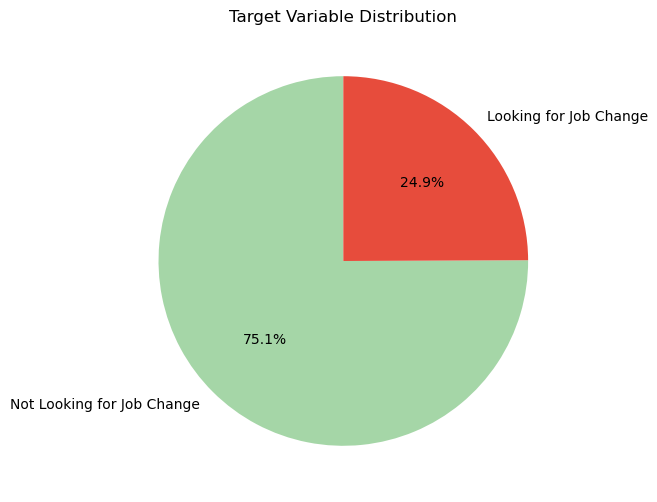

In [85]:
target_counts = Train_data['target'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    target_counts,
    labels=['Not Looking for Job Change', 'Looking for Job Change'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#A5D6A7', '#e74c3c']
)
plt.title("Target Variable Distribution")
plt.show()

<div style="
    background-color:#a478d1;
    color:white;
    padding:8px;
    border-radius:8px;
    font-size:14px;
    box-shadow: 0px 4px 8px rgba(0,0,0,0.3);
">
<ul style="margin-top:0;">
    <li>The target variable is imbalanced, with the majority of employees not actively looking for a job change(75%), while a smaller portion are seeking new opportunities(25%).</li>
   </ul>
</div>

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>4.2 Categorical Features vs Target</b><br>

In [86]:
cat_cols = [
    'gender',
    'relevent_experience',
    'enrolled_university',
    'education_level',
    'major_discipline',
    'company_type'
]

target_col = 'target'

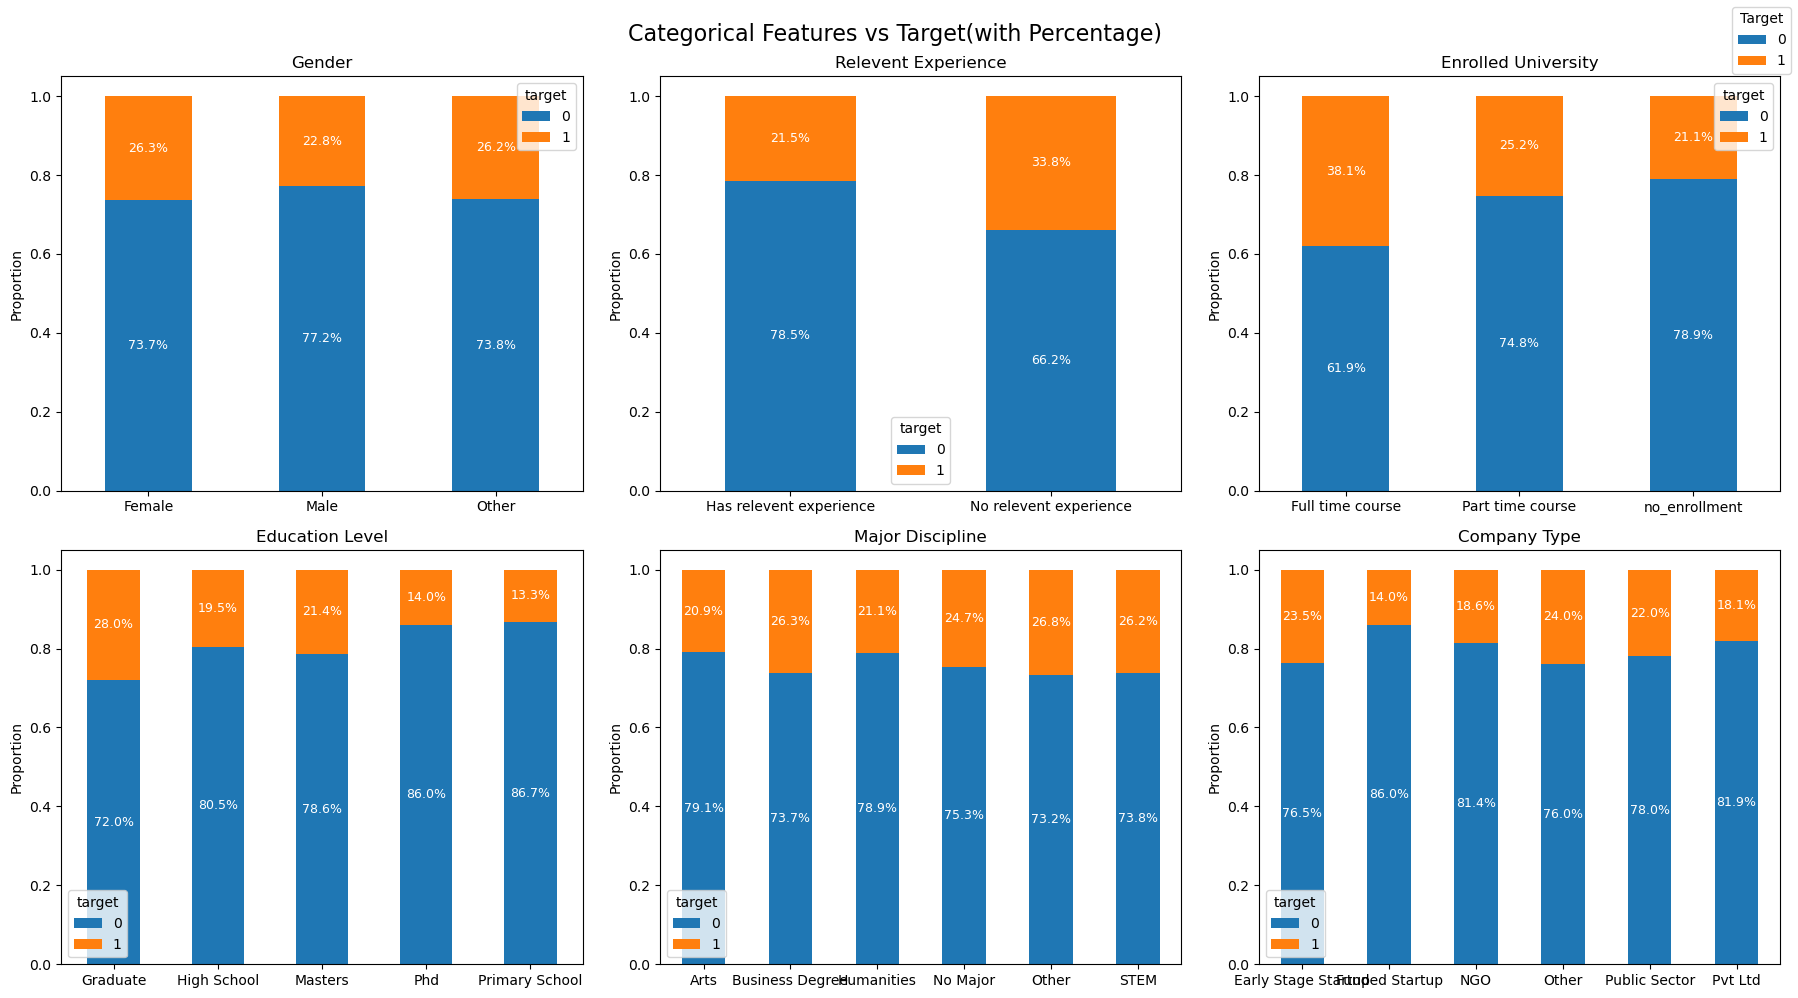

In [87]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):

    # Proportion table
    prop_df = (
        Train_data.groupby([col, target_col])
        .size()
        .unstack()
        .apply(lambda x: x / x.sum(), axis=1)
    )

    ax = axes[i]
    prop_df.plot(kind='bar', stacked=True, ax=ax)

    # Add percentage labels inside bars
    for idx, row in prop_df.iterrows():
        cumulative = 0
        for target in prop_df.columns:
            value = row[target]
            if value > 0:
                ax.text(
                    prop_df.index.get_loc(idx),
                    cumulative + value / 2,
                    f'{value*100:.1f}%',
                    ha='center',
                    va='center',
                    fontsize=9,
                    color='white'
                )
            cumulative += value

    ax.set_title(col.replace('_', ' ').title())
    ax.set_xlabel('')
    ax.set_ylabel('Proportion')
    ax.tick_params(axis='x', rotation=0)

# Common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Target', loc='upper right')

plt.suptitle('Categorical Features vs Target(with Percentage)',
fontsize=16)
plt.tight_layout()
plt.show()

<div style="
    background-color:#3b1b5a;
    color:white;
    padding:20px;
    border-radius:12px;
    font-style:italic;
    font-size:16px;
    box-shadow: 0px 4px 12px rgba(0,0,0,0.4);
">
<b>📝These stacked percentage bar plots show the proportion of employees who stayed (Target = 0) and who left (Target = 1) across different categorical features. In most categories, approximately 70–80% of employees are retained, while 20–30% leave, indicating overall higher retention. For example, across gender categories, around three-quarters of employees stayed while about one-quarter left. Similar patterns are observed for education level, major discipline, relevant experience, enrolled university, and company type, where the retention percentage consistently remains higher than attrition. These percentage comparisons help identify how categorical features moderately influence employee retention while maintaining a consistent overall trend. </b><br>
</ul>
</div>

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>4.3 Correlation Matrix</b><br>

<div style="
    background-color:#3b1b5a;
    color:white;
    padding:20px;
    border-radius:12px;
    font-style:italic;
    font-size:16px;
    box-shadow: 0px 4px 12px rgba(0,0,0,0.4);
">
<b>📝 Note:</b><br>
<li>Certain features such as experience, company size, and last new job were ordinal or range-based categorical variables. These were transformed into temporary numerical representations to preserve ordering and scale before correlation analysis.</li>
</ul>
</div>

In [88]:
Train_data['experience_num'] = Train_data['experience'].replace({
    '<1': 0,
    '>20': 21
})

Train_data['experience_num'] = pd.to_numeric(Train_data['experience_num'], errors='coerce')

In [89]:
Train_data['last_new_job_num'] = Train_data['last_new_job'].replace({
    'never': 0,
    '>4': 5
})

Train_data['last_new_job_num'] = pd.to_numeric(Train_data['last_new_job_num'], errors='coerce')

In [90]:
def company_size_map(x):
    if pd.isna(x):
        return None
    x = str(x).strip()

    if x == '<10':
        return 5
    if x == '1000+':
        return 10000
    if '-' in x:
        try:
            a, b = x.split('-')
            return (int(a) + int(b)) / 2
        except:
            return None
    return None

Train_data['company_size_num'] = Train_data['company_size'].apply(company_size_map)

In [91]:
Train_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,experience_num,last_new_job_num,company_size_num
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1,21.0,1.0,NaN
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,15.0,5.0,74.5
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0,5.0,0.0,NaN
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1,0.0,0.0,NaN
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0,21.0,4.0,74.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1,14.0,1.0,NaN
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1,14.0,4.0,NaN
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0,21.0,4.0,74.5
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0,0.0,2.0,749.5


<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
 <b>Heat map for Correlation among Numerical feature</b><br>

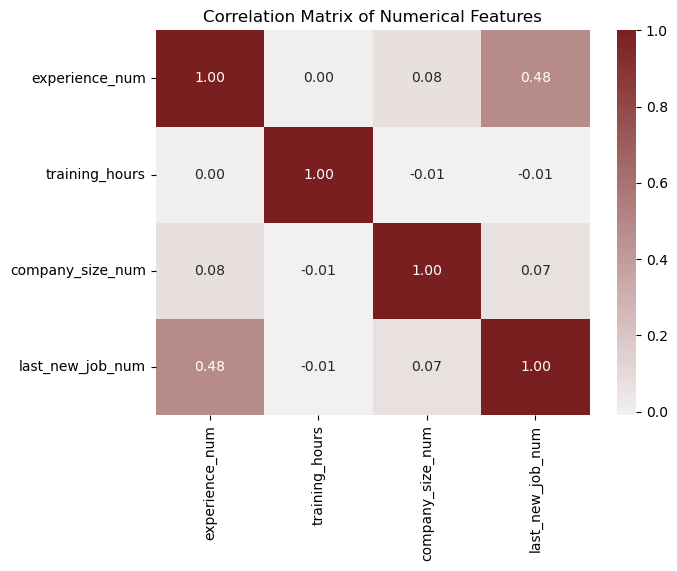

In [92]:
num_cols = [
    'experience_num',
    'training_hours',
    'company_size_num',
    'last_new_job_num'
]

corr = Train_data[num_cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(
    corr,
    annot=True,
    cmap=sns.light_palette("#7a1f1f", as_cmap=True),
    fmt='.2f'
)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

<div style="
    background-color:#a478d1;
    color:white;
    padding:8px;
    border-radius:8px;
    font-size:14px;
    box-shadow: 0px 4px 8px rgba(0,0,0,0.3);
">
<ul style="margin-top:0;">
    <li>1. experience_num ↔ last_new_job_num : 0.48 (moderate positive correlation).</li>
    <li>2. experience_num ↔ company_size_num : 0.08 (very weak).</li>
    <li>3. training_hours shows near‑zero correlations with all features (almost independent).</li>
    <Li>4. company_size_num ↔ last_new_job_num : 0.07 (weak positive).</li>
   </ul>
</div>

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
 <b>4.4 Continous Varibale vs Target</b><br>

In [93]:
num_cols = [
    'experience_num',
    'last_new_job_num',
    'company_size_num'
]

target_col = 'target'

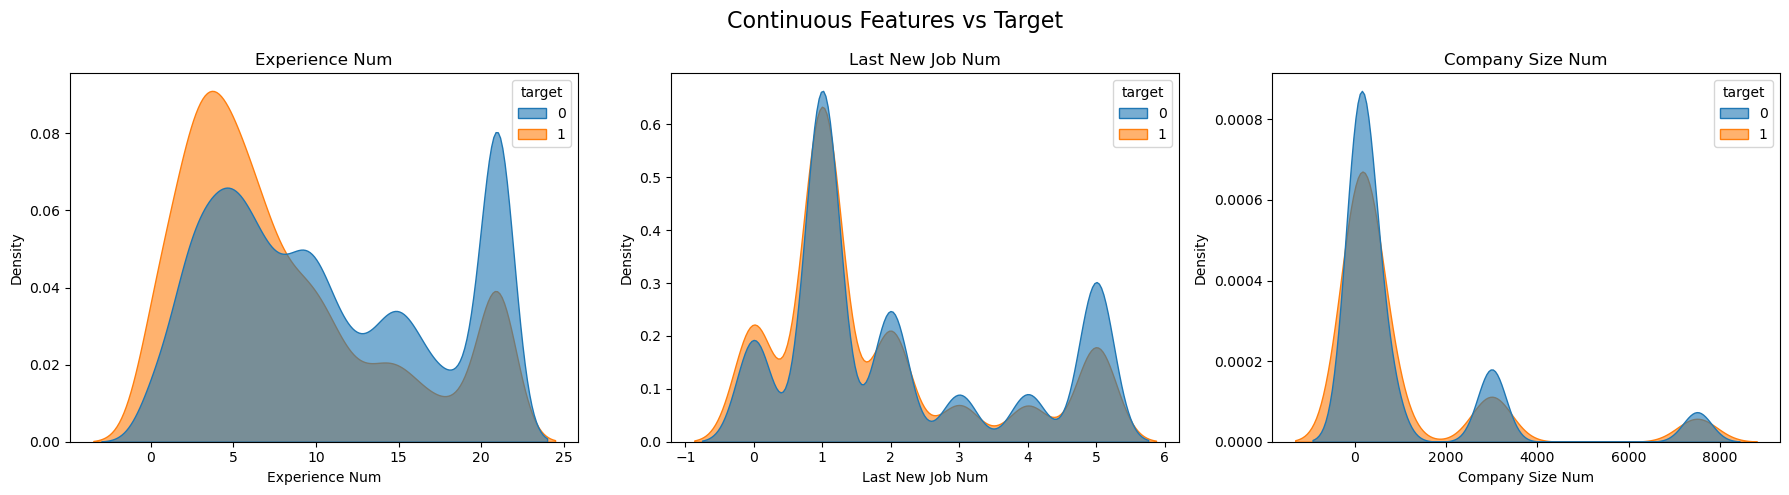

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(num_cols):
    sns.kdeplot(
        data=Train_data,
        x=col,
        hue=target_col,
        fill=True,          # makes wave filled
        common_norm=False,  # separate normalization
        alpha=0.6,
        ax=axes[i]
    )

    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].set_xlabel(col.replace('_', ' ').title())
    axes[i].set_ylabel('Density')

plt.suptitle('Continuous Features vs Target', fontsize=16)
plt.tight_layout()
plt.show()

<div style="
    background-color:#3b1b5a;
    color:white;
    padding:20px;
    border-radius:12px;
    font-style:italic;
    font-size:16px;
    box-shadow: 0px 4px 12px rgba(0,0,0,0.4);
">
<b>📝The density plots comparing continuous features with the target variable indicate that employee retention (Target = 0) dominates across key ranges. For experience, higher experience levels show a stronger concentration of employees who stayed, while lower experience exhibits more overlap, suggesting experience has a meaningful influence on retention. In the last new job plot, the 0–1 year range clearly shows a higher density for Target = 0, indicating that employees who changed jobs recently are more likely to stay rather than leave. Similarly, in the company size plot, the 0–2000 company size range shows a stronger blue peak, confirming higher retention even in smaller organizations. Although overlap exists between classes in all three plots, the dominance of Target = 0 in these key ranges suggests these features have a moderate but informative influence on employee retention. </b><br>
</ul>
</div>

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
 <b>4.5 Distribution of Continuous Variable</b><br>

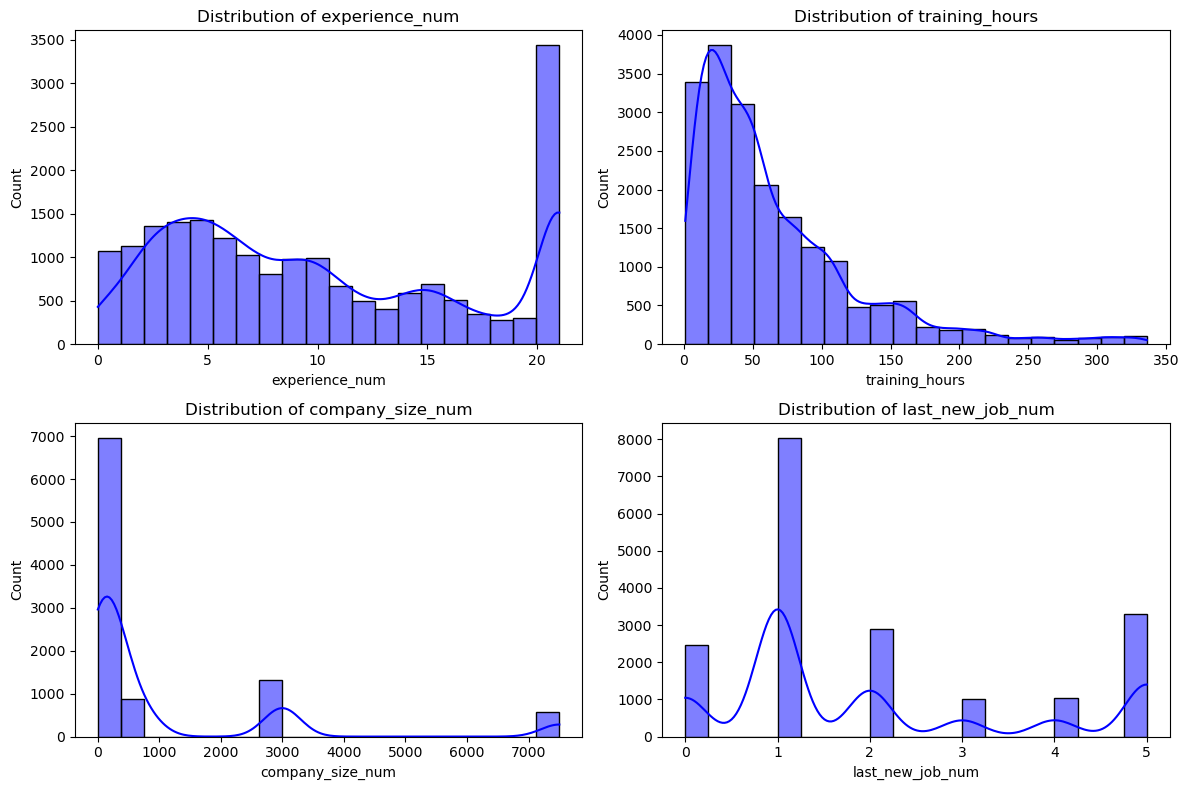

In [34]:
num_features = ['experience_num', 'training_hours', 'company_size_num', 'last_new_job_num']

plt.figure(figsize=(12,8))

for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(Train_data[col], bins=20, kde=True, color='blue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b> 4.4 City Development Index Distribution</b><br>

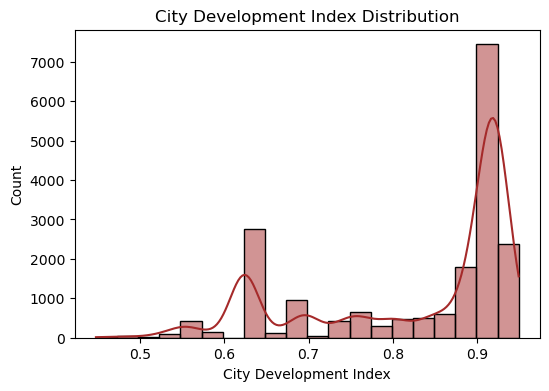

In [35]:
plt.figure(figsize=(6,4))
sns.histplot(Train_data['city_development_index'], bins=20, kde=True, color='brown')
plt.title("City Development Index Distribution")
plt.xlabel("City Development Index")
plt.ylabel("Count")
plt.show()

<div style="
    background-color:#a478d1;
    color:white;
    padding:8px;
    border-radius:8px;
    font-size:14px;
    box-shadow: 0px 4px 8px rgba(0,0,0,0.3);
">
<ul style="margin-top:0;">
    <li>Higher city development index values represent better infrastructure and economic opportunities, which may influence employee satisfaction and retention.</li> 
   </ul>
</div>

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
 <b>4.5 Boxplot for Outlier detection(Training Hours)</b><br>

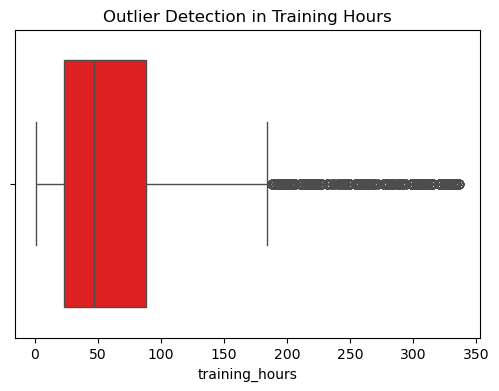

In [36]:
plt.figure(figsize=(6,4))
sns.boxplot(x=Train_data['training_hours'], color='red')
plt.title("Outlier Detection in Training Hours")
plt.show()

<div style="
    background-color:#a478d1;
    color:white;
    padding:8px;
    border-radius:8px;
    font-size:14px;
    box-shadow: 0px 4px 8px rgba(0,0,0,0.3);
">
<ul style="margin-top:0;">
    <li>Outliers are observed in training hours, indicating a small group of employees receiving significantly higher training exposure.</li> 
   </ul>
</div>

<div style="
    background-color:#3b1b5a;
    color:white;
    padding:20px;
    border-radius:12px;
    font-style:italic;
    font-size:16px;
    box-shadow: 0px 4px 12px rgba(0,0,0,0.4);
">
<b>📝 INFERENCE:</b><br>
<li>EDA was performed to understand feature distributions, detect outliers,Imbalances, analyze correlations, and identify patterns influencing employee retention.”</li>
</ul>
</div>

<div style="
    background-color:#b30000;
    color:white;
    padding:8px 16px;
    font-size:22px;
    font-weight:bold;
    border-radius:4px;
    margin:8px 0;
">
Step 5 | Preprocessing of dataset
</div>

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>5.1 Remove Irrelevant Columns</b><br>

In [37]:
Train_data.drop(columns=['enrollee_id','experience_num','company_size_num','last_new_job_num'],inplace=True)


In [38]:
Test_data.drop(columns=['enrollee_id'],inplace=True)

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>5.2 Handling Missing Value</b><br>

In [39]:
cat_cols = [
    'gender',
    'enrolled_university',
    'education_level',
    'major_discipline',
    'experience',
    'company_size',
    'company_type',
    'last_new_job'
]

for col in cat_cols:
    Train_data[col].fillna(Train_data[col].mode()[0], inplace=True)
    Test_data[col].fillna(Test_data[col].mode()[0], inplace=True)

In [40]:
Train_data.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

<div style="
    background-color:#e8f5e9;
    padding:15px;
    border-left:6px solid #4caf50;
    border-radius:6px;
    font-size:16px;
    line-height:1.6;
">
<b>Why Mode is used for Categorical Missing Values:</b><br><br>
Categorical variables represent labels without inherent numerical order or distance.
Median requires numerical ordering, which makes it unsuitable.
Mode preserves the most frequent valid category and maintains the data’s semantic meaning,
making it the correct choice for imputing categorical missing values.
</div>

<div style="
    background-color:#b30000;
    color:white;
    padding:8px 16px;
    font-size:22px;
    font-weight:bold;
    border-radius:4px;
    margin:8px 0;
">
Step 6 | Outlier Detection and Handling
</div>

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>6.1 Calculate Q1, Q3, IQR and Define lower and upper bounds</b><br>


In [41]:
Q1 = Train_data['training_hours'].quantile(0.25)
Q3 = Train_data['training_hours'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>6.2 Identify Outliers</b><br>

In [42]:
outliers = Train_data[
    (Train_data['training_hours'] < lower) |
    (Train_data['training_hours'] > upper)
]

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>6.3 Counting number of Outliers</b><br>

In [43]:
outlier_count = outliers.shape[0]
outlier_count

984

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>6.4 Treating outliers using clipping</b><br>

In [44]:
Train_data['training_hours'] = Train_data['training_hours'].clip(lower, upper)

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>6.5 Visualization after Outlier handling</b><br>

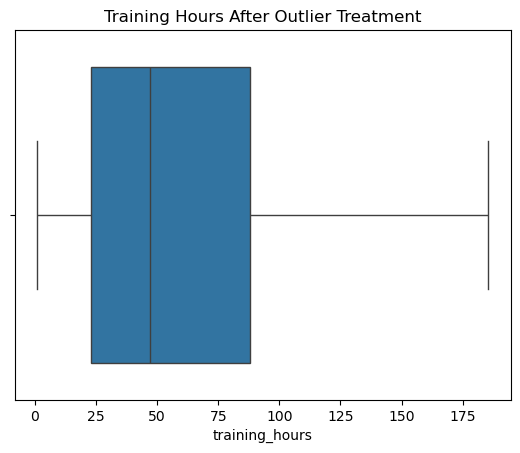

In [45]:
sns.boxplot(x=Train_data['training_hours'])
plt.title("Training Hours After Outlier Treatment")
plt.show()

<div style="
    background-color:#3b1b5a;
    color:white;
    padding:20px;
    border-radius:12px;
    font-style:italic;
    font-size:16px;
    box-shadow: 0px 4px 12px rgba(0,0,0,0.4);
">
<b>📝 Note:</b><br>
Outliers can skew model performance and outlier detection is done only on numerical columnUsually, we don't remove outleirs in Test Data; Test Data should reflect real distribution.
</div>

<div style="
    background-color:#b30000;
    color:white;
    padding:8px 16px;
    font-size:22px;
    font-weight:bold;
    border-radius:4px;
    margin:8px 0;
">
Step 7 | Encode Categorical Variables
</div>

In [46]:
cat_cols = ['city', 'gender', 'relevent_experience', 'enrolled_university', 
            'education_level', 'experience', 'major_discipline', 'company_size', 'company_type', 
            'last_new_job']

le = LabelEncoder()

for col in cat_cols:
    # Ensure columns are strings
    Train_data[col] = Train_data[col].astype(str)
    Test_data[col] = Test_data[col].astype(str)
    
    # Fit-transform train, transform test
    le.fit(Train_data[col])
    Train_data[col] = le.transform(Train_data[col])
    Test_data[col] = le.transform(Test_data[col])

In [47]:
Train_data

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5,0.920,1,0,2,0,5,21,4,5,0,36.0,1
1,77,0.776,1,1,2,0,5,6,4,5,4,47.0,0
2,64,0.624,1,1,0,0,5,15,4,5,5,83.0,0
3,14,0.789,1,1,2,0,1,20,4,5,5,52.0,1
4,50,0.767,1,0,2,2,5,21,4,1,3,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,55,0.878,1,1,2,0,2,5,4,5,0,42.0,1
19154,5,0.920,1,0,2,0,5,5,4,5,3,52.0,1
19155,5,0.920,1,0,2,0,5,21,4,5,3,44.0,0
19156,94,0.802,1,0,2,1,5,20,5,5,1,97.0,0


<div style="
    background-color:#3b1b5a;
    color:white;
    padding:20px;
    border-radius:12px;
    font-style:italic;
    font-size:16px;
    box-shadow: 0px 4px 12px rgba(0,0,0,0.4);
">
<b>📝 Note:</b><br>
<li>Fit on TRAIN, Apply on TEST</li>
<li>Encoders are fit only on training data to avaoid data leakage</li>
<li>The same encoding is applied to test data</li>
<li>This step is necessary because machine learning models cannot process categorical text values directly</li>
 </ul>
</div>

<div style="
    background-color:#b30000;
    color:white;
    padding:8px 16px;
    font-size:22px;
    font-weight:bold;
    border-radius:4px;
    margin:8px 0;
">
Step 8 | Feature And Target Separation
</div>

<div style="
    background-color:#3b1b5a;
    color:white;
    padding:20px;
    border-radius:12px;
    font-style:italic;
    font-size:16px;
    box-shadow: 0px 4px 12px rgba(0,0,0,0.4);
">
<b>📝 Remember:</b><br>
<li>The Feature and Target Separation is done only on Training dataset</li>
 </ul>
</div>

In [48]:
X = Train_data.drop('target', axis=1)
y = Train_data['target']

<div style="
    background-color:#b30000;
    color:white;
    padding:8px 16px;
    font-size:22px;
    font-weight:bold;
    border-radius:4px;
    margin:8px 0;
">
Step 9 | Train-Validation Split
</div>

In [49]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

<div style="
    background-color:#a478d1;
    color:white;
    padding:8px;
    border-radius:8px;
    font-size:14px;
    box-shadow: 0px 4px 8px rgba(0,0,0,0.3);
">
<ul style="margin-top:0;">
    <li>Validation of data is used to evaluate model performace on unseen data (Test dara)</li>
     </ul>
</div>

<div style="
    background-color:#b30000;
    color:white;
    padding:8px 16px;
    font-size:22px;
    font-weight:bold;
    border-radius:4px;
    margin:8px 0;
">
Step 10 | Scaling (Important for Logistic Regression)
</div>

In [50]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

<div style="
    background-color:#3b1b5a;
    color:white;
    padding:20px;
    border-radius:12px;
    font-style:italic;
    font-size:16px;
    box-shadow: 0px 4px 12px rgba(0,0,0,0.4);
">
<b>📝NOTE:</b><br>
<li>Never Fit Scaler on Validation or Test Data</li>
 </ul>
</div>

<div style="
    background-color:#b30000;
    color:white;
    padding:8px 16px;
    font-size:22px;
    font-weight:bold;
    border-radius:4px;
    margin:8px 0;
">
Step 11 | Handle Class Imbalance Using SMOTE
</div>

In [51]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train_scaled, y_train
)

In [52]:
pd.Series(y_train_smote).value_counts()

target
0    11504
1    11504
Name: count, dtype: int64

<div style="
    background-color:#3b1b5a;
    color:white;
    padding:20px;
    border-radius:12px;
    font-style:italic;
    font-size:16px;
    box-shadow: 0px 4px 12px rgba(0,0,0,0.4);
">
<b>📝NOTE: (Applied only on training data)</b><br>
<li>In this step, SMOTE (Synthetic Minority Over-sampling Technique) is used to handle class imbalance in the training dataset, as an unequal target class distribution can bias the model toward the majority class. SMOTE generates synthetic samples for the minority class based on feature-space similarity instead of duplicating existing data, which helps the model learn better decision boundaries. To prevent data leakage, SMOTE is applied only to the scaled training features (X_train_scaled) and training labels (y_train), while validation and test datasets remain untouched to preserve real-world distribution. After applying SMOTE, the target classes become balanced, which is verified using value_counts(), showing equal samples (11,504) for both classes, and this balanced data is then used for model training.</li>
 </ul>
</div>

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>11.1 Visualization After SMOTE</b><br>

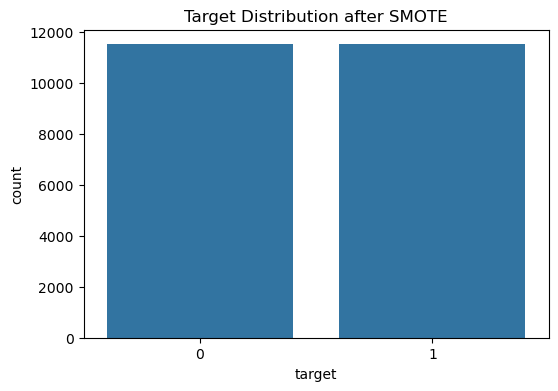

In [53]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_smote)
plt.title("Target Distribution after SMOTE")
plt.show()

<div style="
    background-color:#3b1b5a;
    color:white;
    padding:20px;
    border-radius:12px;
    font-style:italic;
    font-size:16px;
    box-shadow: 0px 4px 12px rgba(0,0,0,0.4);
">
<b>📝INTERPRETATION:</b><br>
<li>Before SMOTE, one class had fewer samples (class imbalance). After applying SMOTE on the training #data, synthetic samples were created for the minority class, so now class 0 and class 1 are balanced. This helps the model learn fairly from both classes and reduces bias toward the majority class.</li>
<li>👉 SMOTE successfully balanced the target variable, and this balanced data is now ready for model training.</li>   
 </ul>
</div>

<div style="
    background-color:#b30000;
    color:white;
    padding:8px 16px;
    font-size:22px;
    font-weight:bold;
    border-radius:4px;
    margin:8px 0;
">
Step 12 | Model Building
</div>

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>12.1 Create a Result Table</b><br>

In [54]:
results=[]

<div style="
    background-color:#a478d1;
    color:white;
    padding:8px;
    border-radius:8px;
    font-size:14px;
    box-shadow: 0px 4px 8px rgba(0,0,0,0.3);
">
<ul style="margin-top:0;">
    <li>Results = [ ] is used to store performance metrics of all models in one place so that we can easily compare Accuracy, precision,recall and f1-score and ROC-AUC and select the best model.</li>
</ul>
</div>

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>12.2 Logistic Regression</b><br>

In [55]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_smote, y_train_smote)

y_pred_lr = lr.predict(X_val_scaled)
y_prob_lr = lr.predict_proba(X_val_scaled)[:, 1]

results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_val, y_pred_lr),
    "ROC_AUC": roc_auc_score(y_val, y_prob_lr)
})

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>12.3 Random Forest Classifier</b><br>

In [56]:
rf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_model = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
rf_model.fit(X_train_smote, y_train_smote)

y_pred_rf = rf_model.predict(X_val_scaled)
y_prob_rf = rf_model.predict_proba(X_val_scaled)[:, 1]
results.append({
    "Model": "Random Forest",
    "Best_Params": rf_model.best_params_,
    "Accuracy": accuracy_score(y_val, y_pred_rf),
    "ROC_AUC": roc_auc_score(y_val, y_prob_rf)
})

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>12.4 XGBoost</b><br>

In [57]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_model = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
xgb_model.fit(X_train_smote, y_train_smote)

y_pred_xgb = xgb_model.predict(X_val_scaled)
y_prob_xgb = xgb_model.predict_proba(X_val_scaled)[:, 1]
results.append({
    "Model": "XGBoost",
    "Best_Params": xgb_model.best_params_,
    "Accuracy": accuracy_score(y_val, y_pred_xgb),
    "ROC_AUC": roc_auc_score(y_val, y_prob_xgb)
})

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>12.5 LightGBM</b><br>

In [58]:
lgbm = LGBMClassifier(random_state=42)
lgbm_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50]
}

lgbm_model = GridSearchCV(
    estimator=lgbm,
    param_grid=lgbm_param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
lgbm_model.fit(X_train_smote, y_train_smote)

y_pred_lgbm = lgbm_model.predict(X_val_scaled)
y_prob_lgbm = lgbm_model.predict_proba(X_val_scaled)[:, 1]
results.append({
    "Model": "LightGBM",
    "Best_Params": lgbm_model.best_params_,
    "Accuracy": accuracy_score(y_val, y_pred_lgbm),
    "ROC_AUC": roc_auc_score(y_val, y_prob_lgbm)
})

[LightGBM] [Info] Number of positive: 11504, number of negative: 11504
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2062
[LightGBM] [Info] Number of data points in the train set: 23008, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


<div style="
    background-color:#3b1b5a;
    color:white;
    padding:20px;
    border-radius:12px;
    font-style:italic;
    font-size:16px;
    box-shadow: 0px 4px 12px rgba(0,0,0,0.4);
">
<b>👉</b><br>
<li>Hyperparameter tuning was performed for all models to optimize model performnace by selecting the best combination of parameter. 
<li>It helps to improve Accuracy and ROC-AUC while reducing overfitting and underfitting</li>
 </ul>
</div>

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>12.6 Comparing all the models to check their performance</b><br>
<li>LightGBM</li>
<li>XGBoost</li>
<li>Random Forest Classifier</li>
<li>Logistic Regression</li>

In [59]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_lgbm))

print("\nClassification Report:")
print(classification_report(y_val, y_pred_lgbm))

Confusion Matrix:
[[2440  437]
 [ 433  522]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2877
           1       0.54      0.55      0.55       955

    accuracy                           0.77      3832
   macro avg       0.70      0.70      0.70      3832
weighted avg       0.77      0.77      0.77      3832



In [60]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_val, y_pred_xgb))

Confusion Matrix:
[[2437  440]
 [ 421  534]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2877
           1       0.55      0.56      0.55       955

    accuracy                           0.78      3832
   macro avg       0.70      0.70      0.70      3832
weighted avg       0.78      0.78      0.78      3832



In [61]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_val, y_pred_rf))

Confusion Matrix:
[[2457  420]
 [ 447  508]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2877
           1       0.55      0.53      0.54       955

    accuracy                           0.77      3832
   macro avg       0.70      0.69      0.69      3832
weighted avg       0.77      0.77      0.77      3832



In [62]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_val, y_pred_lr))

Confusion Matrix:
[[2072  805]
 [ 307  648]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      2877
           1       0.45      0.68      0.54       955

    accuracy                           0.71      3832
   macro avg       0.66      0.70      0.66      3832
weighted avg       0.77      0.71      0.73      3832



In [63]:
results_df = pd.DataFrame(results)
results_df.sort_values(by="ROC_AUC", ascending=False)

,Model,Accuracy,ROC_AUC,Best_Params
3,LightGBM,0.772965,0.790351,"{'learning_rate': 0.1, 'max_depth': 20, 'n_est..."
2,XGBoost,0.775313,0.788199,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti..."
1,Random Forest,0.773747,0.778531,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
0,Logistic Regression,0.709812,0.753035,NaN


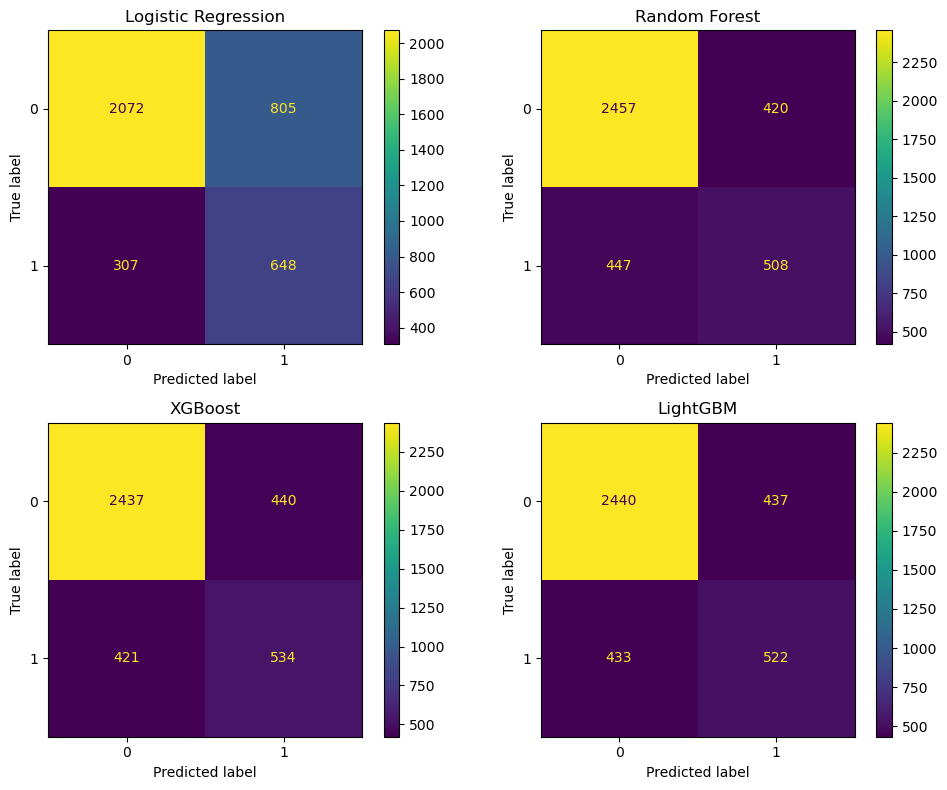

In [64]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10,8))

ConfusionMatrixDisplay.from_predictions(y_val, y_pred_lr, ax=axes[0,0])
axes[0,0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_predictions(y_val, y_pred_rf, ax=axes[0,1])
axes[0,1].set_title("Random Forest")

ConfusionMatrixDisplay.from_predictions(y_val, y_pred_xgb, ax=axes[1,0])
axes[1,0].set_title("XGBoost")

ConfusionMatrixDisplay.from_predictions(y_val, y_pred_lgbm, ax=axes[1,1])
axes[1,1].set_title("LightGBM")

plt.tight_layout()
plt.show()

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:130%; text-align:left">
<b>12.7 Visual Representation of ROC-AUC Curve</b><br>

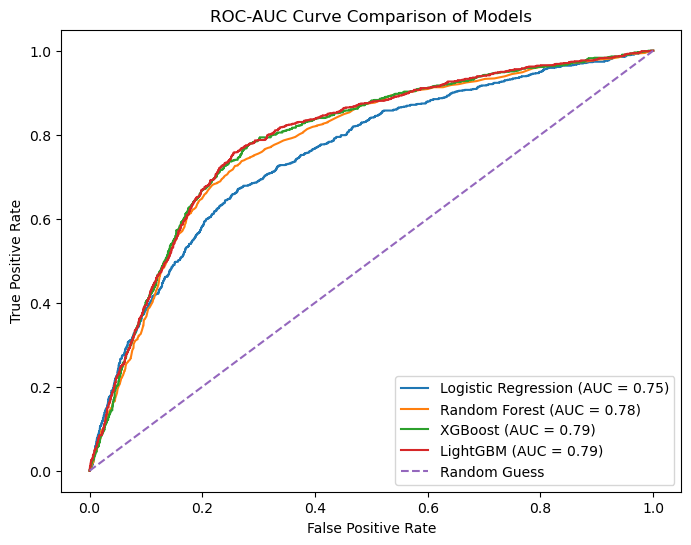

In [65]:
fpr_lr, tpr_lr, _ = roc_curve(y_val, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_val, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_prob_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_lgbm, tpr_lgbm, _ = roc_curve(y_val, y_prob_lgbm)
auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")
plt.plot(fpr_lgbm, tpr_lgbm, label=f"LightGBM (AUC = {auc_lgbm:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve Comparison of Models")
plt.legend(loc="lower right")
plt.show()

<div style="
    background-color:#3b1b5a;
    color:white;
    padding:20px;
    border-radius:12px;
    font-style:italic;
    font-size:16px;
    box-shadow: 0px 4px 12px rgba(0,0,0,0.4);
">
<b>📝INTERPRETATION:</b><br>
"Among all evaluated models, LightGBM achieved the highest ROC–AUC score and demonstrated balanced performance across both classes. While XGBoost showed slightly higher recall for the attrition class, LightGBM provided better overall class separation and stability. Therefore, LightGBM was selected as the final model for employee retention prediction”.
 </ul>
</div>

<div style="
    background-color:#b30000;
    color:white;
    padding:8px 16px;
    font-size:22px;
    font-weight:bold;
    border-radius:4px;
    margin:8px 0;
">
Step 13 | Final Prediction on Test dataset
</div>

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:110%; text-align:left">
<b>13.1 Scaling the Testing data</b><br>

In [66]:
X_test_final=Test_data[X_train.columns]

In [67]:
X_test_scaled = scaler.transform(X_test_final)

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:110%; text-align:left">
<b>13.2 Using the best model LightGBM for Final prediction</b><br>

In [68]:
# Predicted class labels: 0 = stay, 1 = likely to leave
y_test_pred = lgbm_model.predict(X_test_scaled)

# Predicted probabilities for class 1
y_test_prob = lgbm_model.predict_proba(X_test_scaled)[:, 1]

In [69]:
y_test_pred

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
y_test_prob

array([0.08463136, 0.44170286, 0.65325834, ..., 0.0090605 , 0.0962439 ,
       0.12372625])

<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:110%; text-align:left">
<b>13.3 Combining Prediction With Test Dataset</b><br>

In [71]:
Test_data['Predicted_Leave'] = y_test_pred
Test_data['Leave_Probability'] = y_test_prob

Test_data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,Predicted_Leave,Leave_Probability
0,78,0.827,1,0,0,0,5,19,7,5,0,21,0,0.084631
1,5,0.920,0,0,2,0,5,15,4,5,0,98,0,0.441703
2,64,0.624,1,1,2,1,5,20,4,5,5,15,1,0.653258
3,26,0.827,1,0,2,2,5,2,3,5,0,39,0,0.037066
4,5,0.920,1,0,2,0,5,21,2,5,4,72,0,0.136519


<div style="border-radius:4px; padding: 10px; background-color: #FF9500; font-size:110%; text-align:left">
<b>13.4 Actual count of predicted and stays</b><br>

In [72]:
leave_count = (Test_data['Predicted_Leave'] == 1).sum()
stay_count = (Test_data['Predicted_Leave'] == 0).sum()
print(f"Leaving: {leave_count}, Staying: {stay_count}")

Leaving: 515, Staying: 1614


<div style="
    background-color:#3b1b5a;
    color:white;
    padding:20px;
    border-radius:12px;
    font-style:italic;
    font-size:16px;
    box-shadow: 0px 4px 12px rgba(0,0,0,0.4);
">
<b>📝FINAL PREDICTION:</b><br>
 <li>Using the selected best-performing model, predictions were generated on the test dataset to identify employees who are likely to stay or leave the organization. Since the test data does not contain actual labels, it was used strictly for final prediction. Based on the model output, 1614 employees are predicted to stay, while 515 employees are predicted to leave. These results provide actionable insights that can help the organization focus retention strategies on employees with a higher risk of leaving.</li>
 </ul>
</div>

from IPython.display import HTML

HTML("""
<div style="
    text-align:center;
    background-color:#E6BE00;
    padding:30px;
    border-radius:15px;
    box-shadow:0px 4px 12px rgba(0,0,0,0.2);
">
    <h1 style="color:#3b1b5a;">Thank You</h1>
    <p style="font-size:16px; color:#555;">
        Thank you for reviewing this project.
    </p>
    <img src="https://cdn-icons-png.flaticon.com/512/3159/3159066.png"
         alt="Thank You"
         width="150">
</div>
""")